# Redução de Dimensionalidade

### Muitos problemas de aprendizado de máquina estão relacionados com modelos envolvidos em excessivas características para cada instância de treinamento. Esse excesso torna não só o modelo lento como também tráz resultados ruins e/ou overfitting. Podemos chamar isso de ***maldição de dimensionalidade***

**Essa abordagem é boa para**
- [x] DataViz | Reduzir a dimensão para 3, possibilita, por exemplo, uma melhor visão dos dados
- [x] Melhora em geral nos modelos de ML
  
- ### O que ocorre em um espaço de alta dimensão?

Alta dimensionalidade se refere a quantidade de features existentes. *O Big Data* atualmente trouxe esse fenômeno com muita força. **Mas por que isso é um problema?** Dados dentro de um cubo de muitas dimensões correm o risco de serem extremamente esparsos e incrivelmente distantes. Por exemplo, quando se escolhe dois pontos aleatórios dentro de um plano cartesiano 2D (ou um quadrado) a distância média encontrada será de 0,52, em um plano 3D a distância média encontrada é em média 0,62, mas em um plano com 10 milhões de dimensões a distância é aproximadamente 408,2 em média. ***Ou seja, quando um modelo é criado em um espaço de alta dimensionalidade, é provável que as instâncias estejam demasiado longes umas das outras, isso afeta a previsão pois torna a leitura pelo modelo mais difícil e dados pequenos quase nunca são acertivos quando previstos.***

- ### Principais métodos de Redução de Dimensionalidade

|Método|Função|Exemplos
|:--:|:--:|:--:|
|Projeção|Projeta os dados para um espaço de dimensão menor onde as dimensões formam um espaço 2D, os demais que não puderam ser projetados, são excluídos. Esse método é preferível a dados lineares e a interpretação é mais simples|PCA, t-SNE|
|Manifold|É uma abordagem não linear. São dados dispostos, normalmente, de forma espiral (como em uma 3D). A ideia do manifold é desdobrar essas dimensões sem alterar suas distâncias.Seria como ter uma folha de papel com várias dobras e o manifold quer desdobrar uma folha de papel para que volte ao estado natural|LLE, t-SNE|

- ### PCA - Análise dos Componentes Principais

É um método, como visto de projeção, que reduz os dados a dimensões menores, porém é necessário escolher o hiperplano correto antes. Diversos hiperplanos podem gerar dimensões 2D, por exemplo, com variâncias menores e é sempre melhor poder realizar o PCA capturando a maior quantidade de variância possível</br>
Mas calma, o PCA já faz isso, ele escolhe o melhor hiperplano. Desse eixo o PCA também captura o eixo ortogonal, oposto, que pega as variância remanescente. Ele encontra o hiperplano e depois pega a variância remanescente de todas as dimensões anteriores. O **$i$-$ésimo$** componente (a var que sobra das demais dimensões) se chama **componentes principais (PC)**. PCA faz isso usando um técnica chamada de ***Decomposição em Valores Singulares (SVD)*** que decompõe uma matriz em diversas outras onde uma delas possuí os componentes principais. Então, desses componentes se faz a projeção para o hiperplano.

A escolha da quantidade de componentes é recomendado que se escolha a quantidade que some 95% da variância dos dados. Veremos isso aplicando o PCA pelo scikit-learn.

Porém, há como usar PCA para reduzir a dimensionalidade de dados não lineares com um Kernel Trick (Kernal PCA)</br>
Além disso vale lembrar que há possibilidades de usar um PCA incremental para datasets maiores e consumir menos dados. Para isso no param $"n_components"$ ***use um float de 0.0 a 1.0***, isso define o PCA para escolher em % de variância e não dimensão.

Outro ponto importante é que é possível verificar a variância de cada PC com o método ***explained_variance_ratio_*** do PCA para cada componente. Por exemplo, se quis reduzir a dimensão 2D (dois PC) esse método iria lhe entregar a variância de cada componente.

#### Selecionando um Kernal e ajustando Hiperparâmetros

Por ser um algoritmo não supervisionado, não há uma medida de desempenho óbvia para usar. Porém podemos usar um Pipeline que nos auxilie

Por exemplo

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernalPCA

clf = Pipeline(
    [
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression)
    ]
)

param_grid = [
    {
        "kpca _ _ gamma": np.linspace(0.03, 0.05, 10),
        "kpca _ _ Kernel": ["rbf", "sigmoid"]
    }
]

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)

grid.best_params_

```

Outra forma é selecionar o kernel e hiperparms que gerem o menor erro de reconstrução.</br>
Ao se usar o inverse_transform para retornar ao estado original, perde-se informação de dados que não foram reduzidos e sim excluídos. Assim, normalmente pode-se preferir configurar o KernelPCA para que tenha a menor perda possível. ***Mas lembre-se de colocar o hiperparâmetro fit_inverse_transform = True*** no KernelPCA, visto que default é False.

```python

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma=0.0433, fit_inverse_transform = True)

x_reduced = rbf_pca.fit(X)

x_comeBack = rbf_pca.inverse_transform(x_reduced)

from sklearn.metrics import mean_squared_error

mean_squared_error(x, x_comeBack)

#agora use a validação cruzada

```

- ### LLE - Locally Linear Embedding

Trabalha, primeiro, calculando como cada instância de relaciona linearmente com seus vizinhos próximos e, depois, busca uma representação de menor dimensão na qual essas relações serão mais bem preservadas

### PCA, IncrementPCA and KernelPCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
x = iris.data
y = iris.target

pca = PCA(n_components=0.95)
teste2 = pca.fit_transform(x)
teste2.shape[1] #numero de componentes que extraí 95% de variância ou pca.n_components_, pode ser usado no n_components do KernelPCA,
#visto que o KernelPCA não aceita float no n_components

2

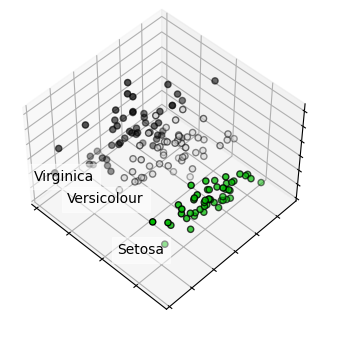

In [2]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = PCA(n_components=3)
pca.fit(x)
X = pca.transform(x)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [3]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10 #vamos dividir x em 10 conjuntos onde cada será transformado
#n_batches precisa ser igual ou menor que a qunatidade de instãncias
inc_pca = IncrementalPCA(n_components=2)

for X_batch in np.array_split(x, n_batches):
    inc_pca.partial_fit(X_batch) #deve-se chamar o método pártial_fit e não fit

x_reduced = inc_pca.transform(x)

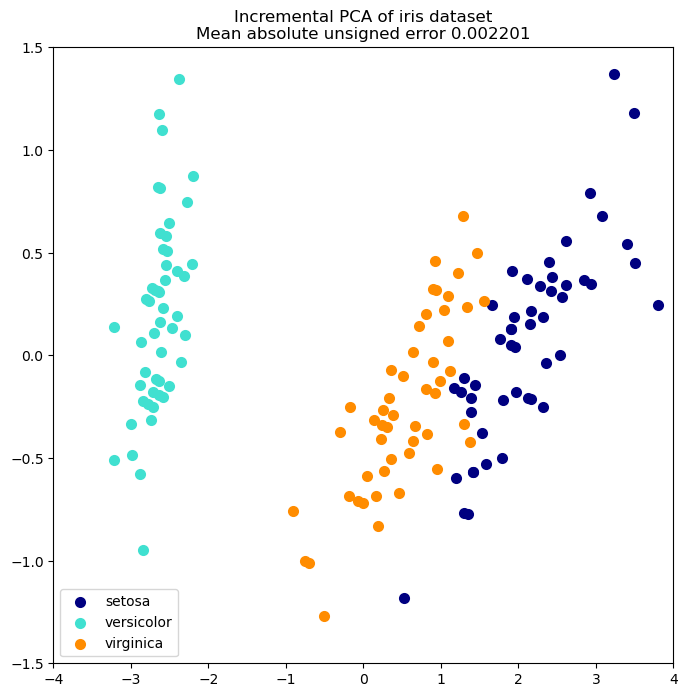

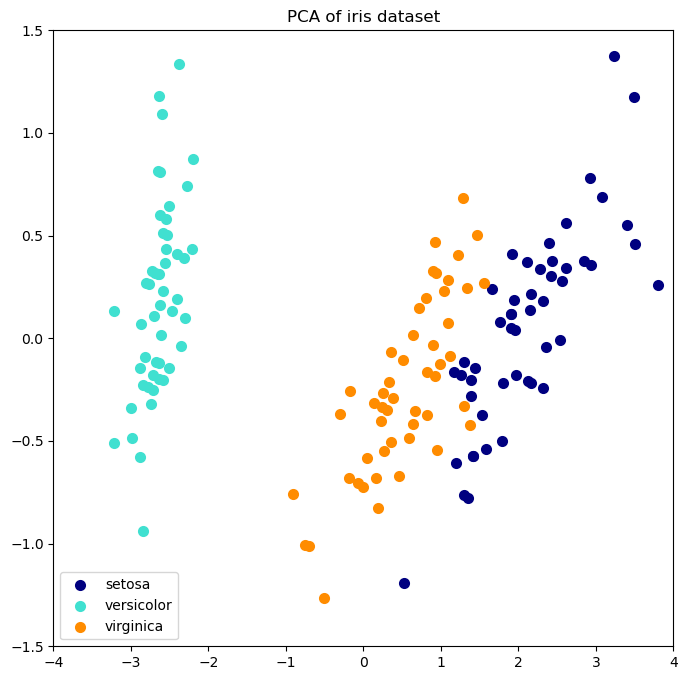

In [4]:
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(x)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA



clf = Pipeline(
    [
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ]
)

param_grid = [
    {
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }
]

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [6]:
grid.best_params_

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}

In [7]:
kernel = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, fit_inverse_transform=True)
teste = kernel.fit_transform(x)

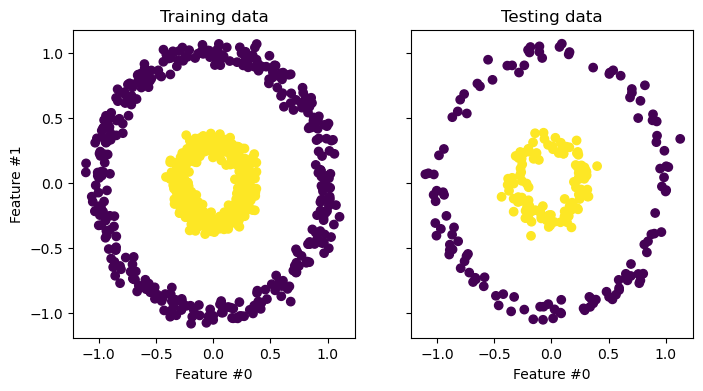

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

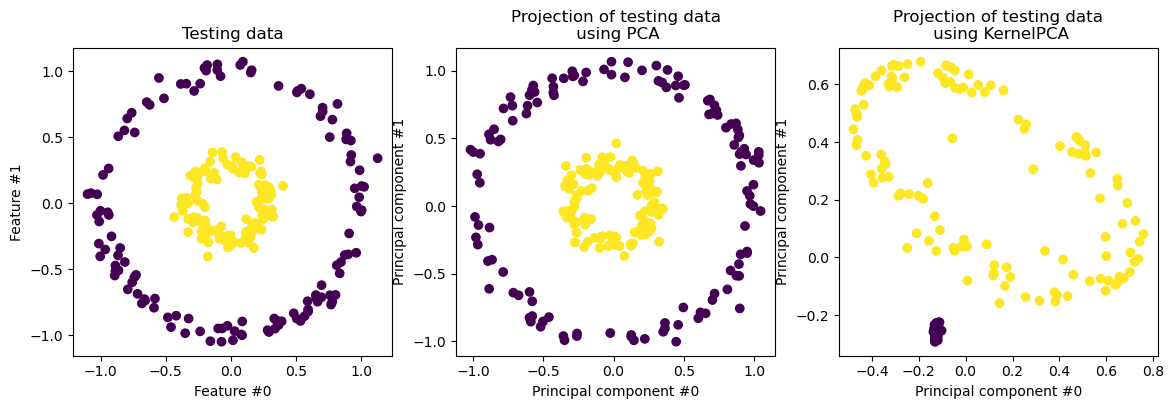

In [9]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

### LLE

In [11]:
from sklearn.manifold import LocallyLinearEmbedding

iris = load_iris()
x = iris.data
y = iris.target

clf = Pipeline(
    [
        ("lle", LocallyLinearEmbedding(n_components=2)),
        ("log_reg", LogisticRegression())
    ]
)

param_grid = [
    {
        "lle__n_neighbors": [5, 10, 15, 20, 25]
    }
]

grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lle', LocallyLinearEmbedding()),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'lle__n_neighbors': [5, 10, 15, 20, 25]}])

In [12]:
grid.best_params_

{'lle__n_neighbors': 20}

In [13]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
teste3 = lle.fit_transform(X_train)

In [14]:
teste3.shape

(750, 2)